In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#202331016_Nanda Revan Saputro

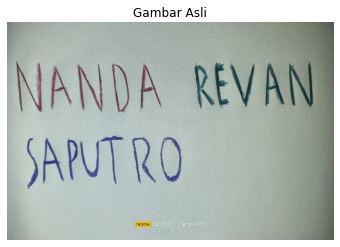

In [3]:
# Load gambar dan resize agar lebih kecil
image = cv2.imread('tulisan7.jpg')
resized_image = cv2.resize(image, (600, 400))

# Konversi ke RGB untuk visualisasi
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()


#202331016_Nanda Revan Saputro

## Menampilkan Warna 202331016_Nanda Revan Saputro

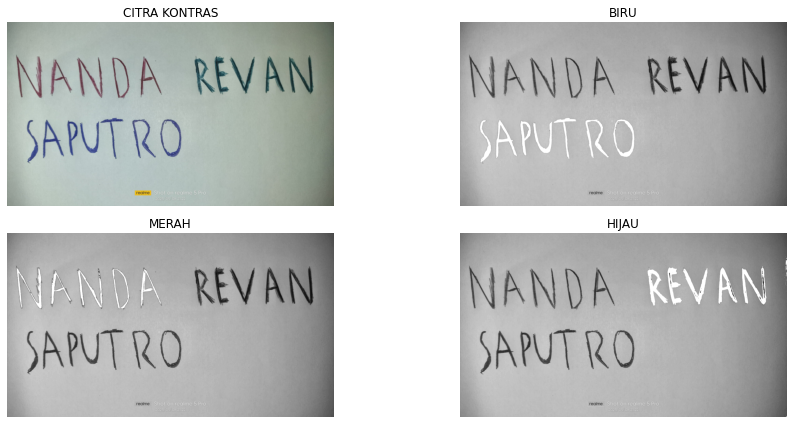

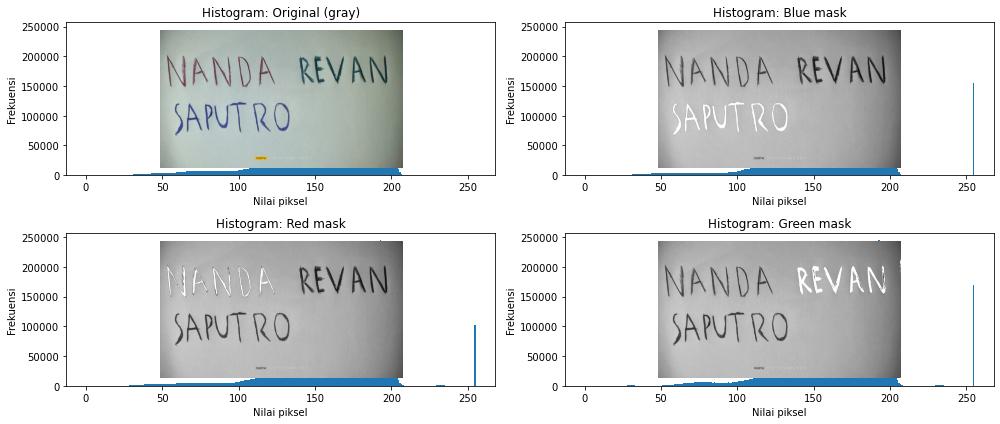

In [36]:
# 1. Baca & konversi
img_bgr = cv2.imread('tulisan7.jpg')
if img_bgr is None:
    raise FileNotFoundError("tulisan7.jpg tidak ditemukan di direktori kerja!")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 2. Grayscale & HSV
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 3. Rentang HSV untuk mask
ranges = {
    'blue'  : (np.array([100,  50,  50]), np.array([140, 255, 255])),
    'green' : (np.array([ 30,  40,  40]), np.array([100, 255, 255])),
    'red1'  : (np.array([  0,  50,  50]), np.array([ 10, 255, 255])),
    'red2'  : (np.array([160,  50,  50]), np.array([180, 255, 255])),
}
mask_blue  = cv2.inRange(hsv, *ranges['blue'])
mask_green = cv2.inRange(hsv, *ranges['green'])
mask_red   = cv2.inRange(hsv, *ranges['red1']) + cv2.inRange(hsv, *ranges['red2'])

# 4. Fungsi highlight teks
def highlight(gray_img, mask):
    out = gray_img.copy()
    out[mask > 0] = 255
    return out

h_blue  = highlight(gray, mask_blue)
h_green = highlight(gray, mask_green)
h_red   = highlight(gray, mask_red)

# 5. Tampilkan empat citra
fig, axs = plt.subplots(2, 2, figsize=(14, 6))
axs[0,0].imshow(img_rgb);        axs[0,0].set_title('CITRA KONTRAS'); axs[0,0].axis('off')
axs[0,1].imshow(h_blue,  cmap='gray'); axs[0,1].set_title('BIRU');       axs[0,1].axis('off')
axs[1,0].imshow(h_red,   cmap='gray'); axs[1,0].set_title('MERAH');      axs[1,0].axis('off')
axs[1,1].imshow(h_green, cmap='gray'); axs[1,1].set_title('HIJAU');      axs[1,1].axis('off')
plt.tight_layout()
plt.show()

# 6. Plot histogram dengan inset yang semakin besar
mapping = [
    ('Histogram: Original (gray)', gray,      img_rgb),
    ('Histogram: Blue mask',       h_blue,   h_blue),
    ('Histogram: Red mask',        h_red,    h_red),
    ('Histogram: Green mask',      h_green,  h_green),
]
positions = [(0,0), (0,1), (1,0), (1,1)]

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for (title, data, inset_img), (r, c) in zip(mapping, positions):
    ax = axs[r][c]
    ax.hist(data.ravel(), bins=256, range=(0,255))
    ax.set_title(title)
    ax.set_xlabel('Nilai piksel')
    ax.set_ylabel('Frekuensi')
    # Inset sangat besar: almost full subplot but keep margin
    axins = ax.inset_axes([0.05, 0.05, 0.9, 0.9])
    if inset_img.ndim == 2:
        axins.imshow(inset_img, cmap='gray')
    else:
        axins.imshow(inset_img)
    axins.axis('off')

plt.tight_layout()
plt.show()

#202331016_Nanda Revan Saputro

## Menampilkan Histogram

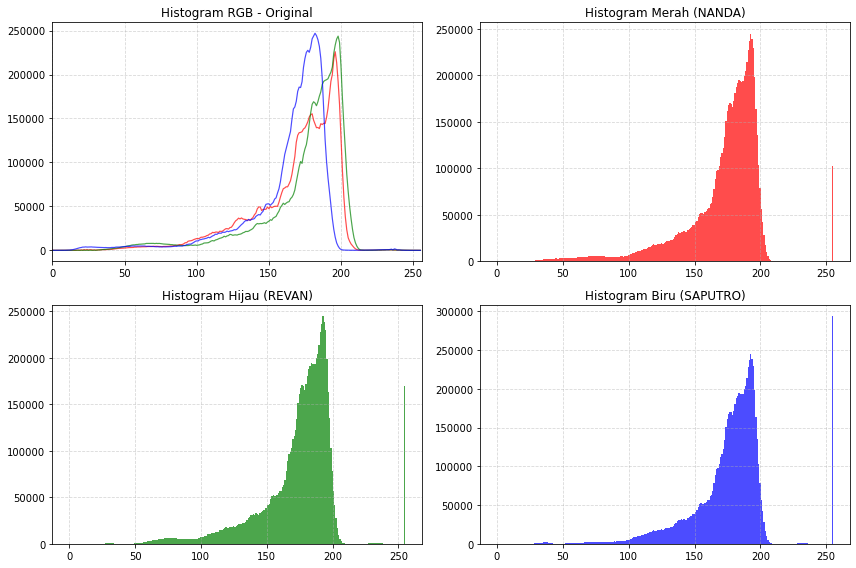

In [47]:
# 1. Baca citra
img_bgr = cv2.imread('tulisan7.jpg')
if img_bgr is None:
    raise FileNotFoundError("File tulisan7.jpg tidak ditemukan!")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 2. Rentang HSV untuk mask
mask_red   = cv2.inRange(hsv, (0, 50, 50), (10, 255, 255)) + cv2.inRange(hsv, (160, 50, 50), (180, 255, 255))
mask_green = cv2.inRange(hsv, (30, 40, 40), (100, 255, 255))
mask_blue  = cv2.inRange(hsv, (80, 50, 50), (140, 255, 255))

# 3. Highlight teks dengan warna murni
def highlight(gray_img, mask, color='red'):
    out = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
    if color == 'red':
        out[mask > 0] = (0, 0, 255)
    elif color == 'green':
        out[mask > 0] = (0, 255, 0)
    elif color == 'blue':
        out[mask > 0] = (255, 0, 0)
    return out

h_red   = highlight(gray, mask_red, 'red')
h_green = highlight(gray, mask_green, 'green')
h_blue  = highlight(gray, mask_blue, 'blue')

# 4. Ambil channel warna yang relevan saja
red_channel   = h_red[:, :, 2]     # Red channel
green_channel = h_green[:, :, 1]   # Green channel
blue_channel  = h_blue[:, :, 0]    # Blue channel

# 5. Fungsi plot histogram RGB untuk citra asli
def plot_rgb_histogram(image, title, ax):
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=color, alpha=0.7, linewidth=1.2)
    ax.set_title(title)
    ax.set_xlim([0, 256])
    ax.grid(True, linestyle='--', alpha=0.5)

# 6. Plot 4 histogram saja
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram RGB - Original
plot_rgb_histogram(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR), "Histogram RGB - Original", axs[0, 0])

# Histogram Merah (NANDA)
axs[0, 1].hist(red_channel.ravel(), bins=256, range=(0,255), color='red', alpha=0.7)
axs[0, 1].set_title("Histogram Merah (NANDA)")
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

# Histogram Hijau (REVAN)
axs[1, 0].hist(green_channel.ravel(), bins=256, range=(0,255), color='green', alpha=0.7)
axs[1, 0].set_title("Histogram Hijau (REVAN)")
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

# Histogram Biru (SAPUTRO)
axs[1, 1].hist(blue_channel.ravel(), bins=256, range=(0,255), color='blue', alpha=0.7)
axs[1, 1].set_title("Histogram Biru (SAPUTRO)")
axs[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#202331016_Nanda Revan Saputro